In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
from tqdm import tqdm
# import mediapipe as mp

actions/SkateBoarding-Front/012/Thumbs.db
actions/SkateBoarding-Front/012/1058-22052.jpg


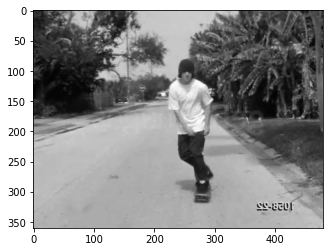

In [2]:

actions = ['SkateBoarding-Front', 'Walk-Front']
DATADIR = "actions/"

for action in actions:  
    path = os.path.join(DATADIR,action)  
    for number in os.listdir(path):  
        imgs = os.path.join(path, number)
        for img in os.listdir(imgs):
            print(os.path.join(imgs,img))
            if (img.endswith(".jpg")):
                img_array = cv.imread(os.path.join(imgs,img) ,cv.IMREAD_GRAYSCALE)  
                plt.imshow(img_array, cmap='gray')  
                plt.show()  
                break
            
        break  
    break


In [13]:

features = []
labels = []
IMG_SIZE = 70
def create_training_data():
    for index, action in enumerate(actions):   
        path = os.path.join(DATADIR,action)  
        for number in os.listdir(path):  
            imgs = os.path.join(path, number)
            for img in tqdm(os.listdir(imgs)):
                if (img.endswith(".jpg")):
                    try:
                        img_array = cv.imread(os.path.join(imgs,img) ,cv.IMREAD_GRAYSCALE)  
                        resized_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                        features.append(resized_array)  
                        labels.append(index)  
                    except Exception as e: 
                        pass
                    
create_training_data()

100%|██████████| 111/111 [00:00<00:00, 408.50it/s]


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

features = np.asarray(features).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
labels = np.array(labels)
actions = np.array(actions)
# one_hot_encoded_labels = to_categorical(labels)
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = 20)

In [16]:
print(len(features))
print(len(labels))
features_train.shape


3027
3027


(2270, 70, 70, 1)

In [6]:
from tensorflow.keras.layers import Dropout, Dense, LSTM, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *

In [7]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
 
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
   
    print(e)

2022-05-15 09:01:23.299938: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-15 09:01:23.398664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:01:23.449074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:01:23.449244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

1 Physical GPUs, 1 Logical GPU


ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:01:36.535887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:01:36.536008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:01:36.536097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1220 MB memory:  -> device: 0, name: NVIDIA GeForce GT 1030, pci bus id: 0000:29:00.0, compute capability: 6.1


In [18]:
features.shape[1:]

(70, 70, 1)

In [20]:

# model = create_LSTM_model()
model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(70,70)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(features_train,  labels_train, epochs = 10, callbacks = [early_stopping_callback])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 70, 32)            13184     
                                                                 
 lstm_7 (LSTM)               (None, 70, 64)            24832     
                                                                 
 dense_6 (Dense)             (None, 70, 32)            2080      
                                                                 
 dense_7 (Dense)             (None, 70, 64)            2112      
                                                                 
 dense_8 (Dense)             (None, 70, 1)             65        
                                                                 
Total params: 42,273
Trainable params: 42,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: in user code:

    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/mnt/home2/pythonProject/sports-action/env/lib/python3.8/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 70) are incompatible
